## Assessing the riskiness of a single stock in Python
#### https://medium.com/python-data/assessing-the-riskiness-of-a-single-stock-in-python-12f2c5bb85b2

## Assessing the riskiness of a portfolio with Python
#### https://medium.com/python-data/assessing-the-riskiness-of-a-portfolio-with-python-6444c727c474


## Assessing Risks and Return with Probabilities of Events with Python
#### https://medium.com/python-data/assessing-risks-and-return-with-probabilities-of-events-with-python-c564d9be4db4


In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
# Specify starting and end periods with Datetime

start = datetime(2016,1,1)
end = datetime(2017,1,1)

In [3]:
# Get Apple's stock info

apple = web.DataReader('AAPL', data_source='yahoo', start=start, end=end)
# Check the data

apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.213585
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.752419
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,93.878586
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,89.916473
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.391907


In [4]:

# Slice the Adjusted Closing prices we need 

aapl_close = apple['Adj Close']
aapl_close.head()

Date
2016-01-04    98.213585
2016-01-05    95.752419
2016-01-06    93.878586
2016-01-07    89.916473
2016-01-08    90.391907
Name: Adj Close, dtype: float64

In [5]:

# Calculate daily returns 

daily_returns = aapl_close.pct_change()
daily_returns.head()

Date
2016-01-04         NaN
2016-01-05   -0.025059
2016-01-06   -0.019570
2016-01-07   -0.042205
2016-01-08    0.005287
Name: Adj Close, dtype: float64

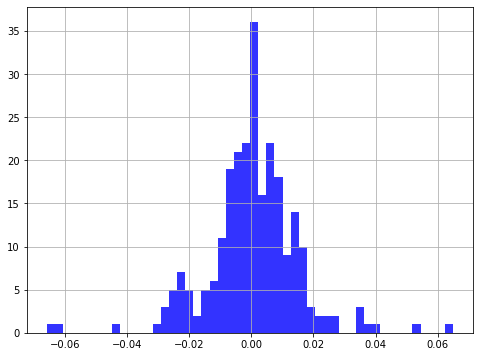

In [8]:
daily_returns.hist(bins=50, alpha=0.8, color='blue', figsize=(8,6));

In [9]:
# Let's have fun by comparing the volatility of three stocks. Pull Ajdusted closing prices for Apple, Fb and Tesla

assets = ['AAPL', 'FB', 'TSLA']

df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start=start, end=end)['Adj Close']
    
df.head()

,AAPL,FB,TSLA
Date,,,
2016-01-04,98.213585,102.220001,223.410004
2016-01-05,95.752419,102.730003,223.429993
2016-01-06,93.878586,102.970001,219.039993
2016-01-07,89.916473,97.919998,215.649994
2016-01-08,90.391907,97.330002,211.000000


In [10]:
# Check the daily returns of the three companies

asset_returns_daily = df.pct_change()
asset_returns_daily.head()

,AAPL,FB,TSLA
Date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,-0.025059,0.004989,0.000089
2016-01-06,-0.019570,0.002336,-0.019648
2016-01-07,-0.042205,-0.049043,-0.015477
2016-01-08,0.005287,-0.006025,-0.021563


In [11]:

# Check the volatility of the daily returns of the three companines

asset_volatility_daily = asset_returns_daily.std()
asset_volatility_daily

AAPL    0.014731
FB      0.017840
TSLA    0.024073
dtype: float64

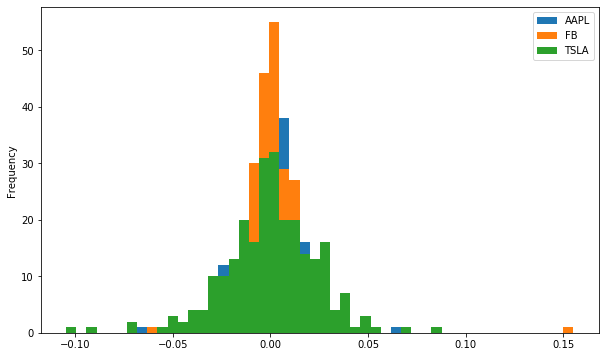

In [12]:
# Visualise the daily returns of the three companies stacked against each other. Notice the most/least volatile?

asset_returns_daily.plot.hist(bins=50, figsize=(10,6));

In [13]:

# As seen in the histogram, Tesla's daily returns are the most volatile with the biggest 'spreads'

asset_volatility_daily.max()

0.02407316302480792

In [14]:
# No surprise Apple's daily returns is the least volatile with such a small spread

asset_volatility_daily.min()

0.01473110901987467

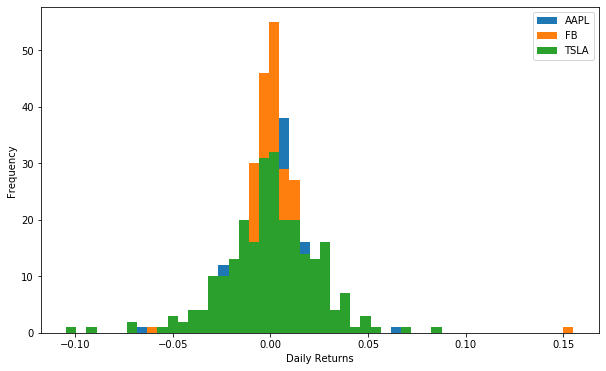

In [15]:
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from datetime import datetime

start = datetime(2016,1,1)
end = datetime(2017,1,1)

assets = ['AAPL', 'FB', 'TSLA']

df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start=start, end=end)['Adj Close']

asset_returns_daily = df.pct_change()
asset_volatility_daily = asset_returns_daily.std()

asset_returns_daily.plot.hist(bins=50, figsize=(10,6));
plt.xlabel('Daily Returns')
plt.show()

### Assessing the riskiness of a portfolio with Python

In [19]:
# Import the Python's number crunchers

from pandas_datareader import data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# Pull Adjusted closing prices for the portfolio (consisting of 5 stocks) we want to construct

assets =  ['AAPL', 'GM', 'GE', 'FB', 'WMT']

df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo',start='2015-1-1' ,end='2017-1-1')['Adj Close']
    
df.head()

,AAPL,GM,GE,FB,WMT
Date,,,,,
2015-01-02,100.216454,27.594938,20.705494,78.449997,75.466400
2015-01-05,97.393181,27.190994,20.325430,77.190002,75.246773
2015-01-06,97.402374,27.602859,19.887522,76.150002,75.826607
2015-01-07,98.768150,28.386992,19.895788,76.150002,77.838448
2015-01-08,102.563072,28.672125,20.135393,78.180000,79.481316


In [21]:
# Check the daily returns

d_returns = df.pct_change()
d_returns.head()

,AAPL,GM,GE,FB,WMT
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.014638,-0.018356,-0.016061,-0.002910
2015-01-06,0.000094,0.015147,-0.021545,-0.013473,0.007706
2015-01-07,0.014022,0.028408,0.000416,0.000000,0.026532
2015-01-08,0.038423,0.010045,0.012043,0.026658,0.021106


In [24]:
# Construct a covariance matrix for the portfolio's daily returns with the .cov() method

cov_matrix_d = d_returns.cov()

# Annualise the daily covariance matrix with the standard 250 trading days

cov_matrix_a = cov_matrix_d * 250
cov_matrix_a

,AAPL,GM,GE,FB,WMT
AAPL,0.062449,0.022449,0.019094,0.030312,0.012588
GM,0.022449,0.062172,0.024010,0.019870,0.012027
GE,0.019094,0.024010,0.039146,0.019633,0.012638
FB,0.030312,0.019870,0.019633,0.072642,0.010714
WMT,0.012588,0.012027,0.012638,0.010714,0.039801


In [25]:
# Assign equal weights to the five stocks. Weights must = 1 so 0.2 for each 

weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [26]:
# Calculate the variance with the formula

port_variance = np.dot(weights.T, np.dot(cov_matrix_a, weights))
port_variance

0.025715066301238123

In [27]:
# Just converting the variance float into a percentage

print(str(round(port_variance, 4) * 100) + '%')

2.5700000000000003%


In [28]:
# The standard deviation of a portfolio is just a square root of its variance

port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_a, weights)))
port_volatility

0.16035917903643096

In [29]:
print(str(round(port_volatility, 4) * 100) + '%')

16.04%


In [30]:
# Proof that Standard deviation of a portfolio is just a square root of its variance

np.dot(weights.T, np.dot(cov_matrix_a, weights)) ** 0.5

0.16035917903643096

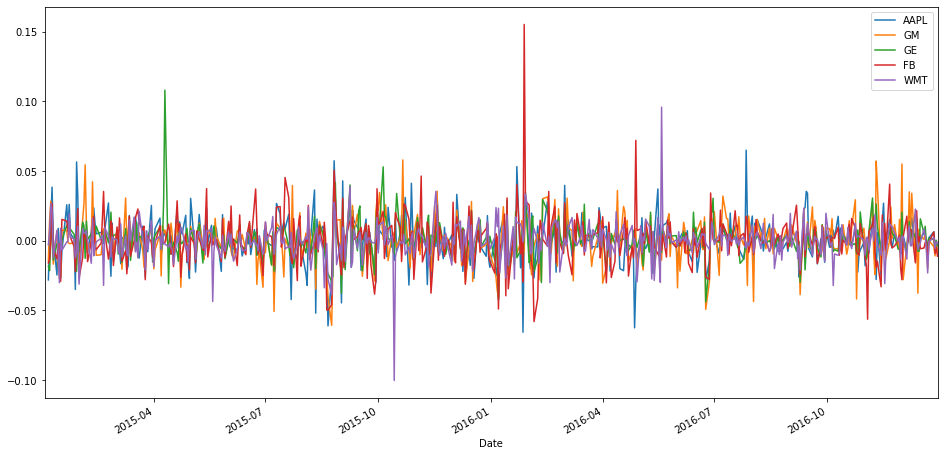

In [31]:

d_returns.plot(figsize=(16,8))

In [32]:
# basic stats on daily returns

d_returns.describe()

,AAPL,GM,GE,FB,WMT
count,503.000000,503.000000,503.000000,503.000000,503.000000
mean,0.000317,0.000301,0.000672,0.000904,-0.000241
std,0.015805,0.015770,0.012513,0.017046,0.012618
min,-0.065706,-0.060811,-0.043924,-0.058105,-0.100405
25%,-0.007169,-0.007759,-0.006040,-0.007638,-0.006160
50%,0.000401,0.000826,0.000367,0.000866,0.000129
75%,0.008564,0.008303,0.006559,0.010170,0.006235
max,0.064963,0.057945,0.108045,0.155214,0.095804


In [33]:
# correlation matrix of daily returns

d_returns.corr()

,AAPL,GM,GE,FB,WMT
AAPL,1.000000,0.360271,0.386169,0.450047,0.252481
GM,0.360271,1.000000,0.486691,0.295677,0.241771
GE,0.386169,0.486691,1.000000,0.368163,0.320161
FB,0.450047,0.295677,0.368163,1.000000,0.199259
WMT,0.252481,0.241771,0.320161,0.199259,1.000000


In [34]:
# annual standard deviation of Apple stock 

d_returns['AAPL'].std() * np.sqrt(250)

0.2498988569810756

In [36]:
percent_var = str(round(port_variance, 4) * 100) + '%'
percent_vols = str(round(port_volatility, 4) * 100) + '%'

In [37]:
print('Variance of Portfolio is {}, Portfolio Risk is {}'
      .format(percent_var, percent_vols))

Variance of Portfolio is 2.5700000000000003%, Portfolio Risk is 16.04%


### Assessing Risks and Return with Probabilities of Events with Python


In [39]:
import numpy as np

#store the variables in arrays
prob = np.array([0.25, 0.5, 0.25])
rate_1 = np.array([0.05, 0.075, 0.10])
rate_2 = np.array([0.2, 0.15, 0.1])

# expected return of each investment
expected_return1 = np.sum(prob * rate_1)
expected_return2 = np.sum(prob * rate_2)

In [40]:
# expected return of the equally weighted portfolio
weights = np.array([0.5, 0.5])
individual_returns = np.array([rate_1, rate_2])
portfolio_returns = np.dot(weights, individual_returns)

In [41]:
# covariance matrix given probabilities
cov_matrix = np.cov(rate_1, rate_2, ddof=0, aweights=prob)

In [42]:
#  variance and standard deviation of each investment
var1 = cov_matrix[0,0]  # variance of any asset is the covariance of its returns WITH its returns
var2 = cov_matrix[1,1]  # variance of any asset is the covariance of its returns WITH its returns
std1 = np.sqrt(var1)  # std deviation is simply the square root of the variance
std2 = np.sqrt(var2)  # std deviation is simply the square root of the variance

#  correlation between Asset 1 & 2's returns
cov = cov_matrix[0,1]
corr = cov / (std1 * std2)  # correlation of returns between 2 assets = covariance of their returns / (their std multiplied)

#  variance of portfolio
portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))

# standard deviation (volatility of the portfolio)
portfolio_vols = np.sqrt(portfolio_var)

In [58]:
import math
#  just a function that returns a percentile for a given float
def percentage (number):
    return str(np.around(number * 100, 3)) + '%'

#  print the various variables for intepretation 
print('Expected Return of Investment 1 = {}'.format(percentage(expected_return1)))
print('Expected Return of Investment 2 = {}'.format(percentage(expected_return2)))
print('Expected Return of Portfolio = {}'.format(percentage(portfolio_returns)))
print('Standard Deviation of Investment 1 = {}'.format(percentage(std1)))
print('Standard Deviation of Investment 1 = {}'.format(percentage(std2)))
print('Correlation between Returns of 1 & 2 = {}'.format(round(corr, 4)))
print('Risk of Portfilio = {}'.format(percentage(portfolio_vols)))

Expected Return of Investment 1 = 7.5%
Expected Return of Investment 2 = 15.0%
Expected Return of Portfolio = [12.5  11.25 10.  ]%
Standard Deviation of Investment 1 = 1.768%
Standard Deviation of Investment 1 = 3.536%
Correlation between Returns of 1 & 2 = -1.0
Risk of Portfilio = 0.884%
